# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | buala
Processing Record 2 of Set 1 | pacific grove
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | invercargill
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | novofedorivka
Processing Record 7 of Set 1 | constantia
Processing Record 8 of Set 1 | kota tinggi
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | olonkinbyen
Processing Record 11 of Set 1 | darwin
Processing Record 12 of Set 1 | midvagur
Processing Record 13 of Set 1 | bushland beach
City not found. Skipping...
Processing Record 14 of Set 1 | martapura
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | port saint john's
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | kailua-kona
Processing Record 19 of Set 1 | belmonte
Processing Record 20 of Set 1 | shamakhi
Processing Record 21 o

Processing Record 37 of Set 4 | mount isa
Processing Record 38 of Set 4 | as sulayyil
Processing Record 39 of Set 4 | mount gambier
Processing Record 40 of Set 4 | porto novo
Processing Record 41 of Set 4 | al hilaliyya
Processing Record 42 of Set 4 | mumbwa
Processing Record 43 of Set 4 | oriximina
Processing Record 44 of Set 4 | port alberni
Processing Record 45 of Set 4 | san isidro
Processing Record 46 of Set 4 | saint-philippe
Processing Record 47 of Set 4 | port douglas
Processing Record 48 of Set 4 | sarmiento
Processing Record 49 of Set 4 | sianow
Processing Record 0 of Set 5 | tuzlukcu
Processing Record 1 of Set 5 | minas de marcona
Processing Record 2 of Set 5 | port shepstone
Processing Record 3 of Set 5 | salekhard
Processing Record 4 of Set 5 | vila velha
Processing Record 5 of Set 5 | corinto
Processing Record 6 of Set 5 | saint-francois
Processing Record 7 of Set 5 | buenaventura
Processing Record 8 of Set 5 | kenora
Processing Record 9 of Set 5 | port augusta
Processing

Processing Record 31 of Set 8 | zeya
Processing Record 32 of Set 8 | karratha
Processing Record 33 of Set 8 | abu dhabi
Processing Record 34 of Set 8 | haiku-pauwela
Processing Record 35 of Set 8 | newman
Processing Record 36 of Set 8 | baharly
Processing Record 37 of Set 8 | az zuwaytinah
Processing Record 38 of Set 8 | ebon
Processing Record 39 of Set 8 | cootamundra
Processing Record 40 of Set 8 | serra
Processing Record 41 of Set 8 | hola prystan'
Processing Record 42 of Set 8 | tver
Processing Record 43 of Set 8 | ashgabat
Processing Record 44 of Set 8 | fort mcmurray
Processing Record 45 of Set 8 | trzebiatow
Processing Record 46 of Set 8 | ola
Processing Record 47 of Set 8 | kapa'a
Processing Record 48 of Set 8 | benghazi
Processing Record 49 of Set 8 | carutapera
Processing Record 0 of Set 9 | san pedro pochutla
Processing Record 1 of Set 9 | coahuayana de hidalgo
Processing Record 2 of Set 9 | kingston
Processing Record 3 of Set 9 | irece
Processing Record 4 of Set 9 | corn is

Processing Record 19 of Set 12 | fonte boa
Processing Record 20 of Set 12 | bubaque
Processing Record 21 of Set 12 | minab
Processing Record 22 of Set 12 | zaozhuang
Processing Record 23 of Set 12 | ouadda
Processing Record 24 of Set 12 | vernon
Processing Record 25 of Set 12 | chulakkurgan
Processing Record 26 of Set 12 | holualoa
Processing Record 27 of Set 12 | askiz
Processing Record 28 of Set 12 | urzhar
Processing Record 29 of Set 12 | lata
Processing Record 30 of Set 12 | mongar
Processing Record 31 of Set 12 | laguna
Processing Record 32 of Set 12 | calamba
Processing Record 33 of Set 12 | kirensk
Processing Record 34 of Set 12 | el jadid
Processing Record 35 of Set 12 | dera bugti
Processing Record 36 of Set 12 | madiun
Processing Record 37 of Set 12 | zhuanghe
Processing Record 38 of Set 12 | tukrah
Processing Record 39 of Set 12 | laojunmiao
Processing Record 40 of Set 12 | seria
Processing Record 41 of Set 12 | la ronge
Processing Record 42 of Set 12 | turpan
Processing Rec

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [5]:
# Convert temperatures from Kelvin to Celsius
city_data_df['Max Temp'] = city_data_df['Max Temp']-273.15
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,buala,-8.1450,159.5921,26.81,81,88,1.89,SB,1697659962
1,pacific grove,36.6177,-121.9166,32.99,42,0,2.57,US,1697659483
2,port-aux-francais,-49.3500,70.2167,3.53,96,100,8.63,TF,1697659449
3,invercargill,-46.4000,168.3500,11.12,85,100,2.24,NZ,1697659448
4,georgetown,5.4112,100.3354,26.68,95,40,1.54,MY,1697659243


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,buala,-8.1450,159.5921,26.81,81,88,1.89,SB,1697659962
1,pacific grove,36.6177,-121.9166,32.99,42,0,2.57,US,1697659483
2,port-aux-francais,-49.3500,70.2167,3.53,96,100,8.63,TF,1697659449
3,invercargill,-46.4000,168.3500,11.12,85,100,2.24,NZ,1697659448
4,georgetown,5.4112,100.3354,26.68,95,40,1.54,MY,1697659243


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

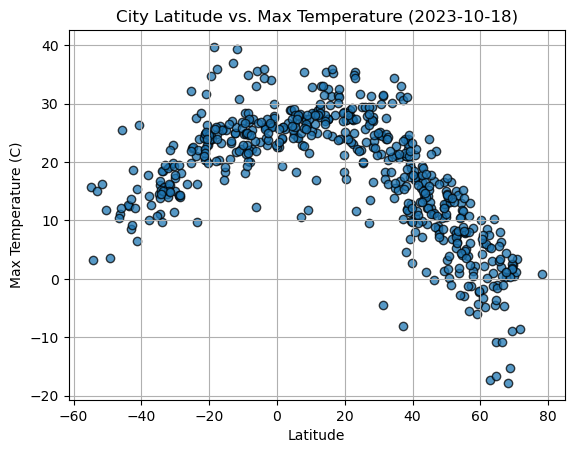

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors='k',alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(visible=True,which='major')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

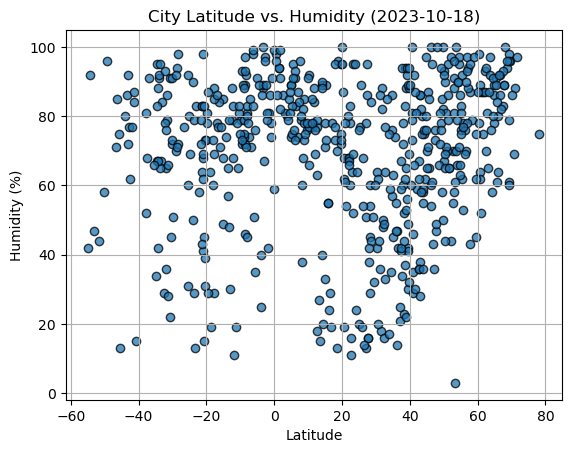

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors='k',alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(visible=True,which='major')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

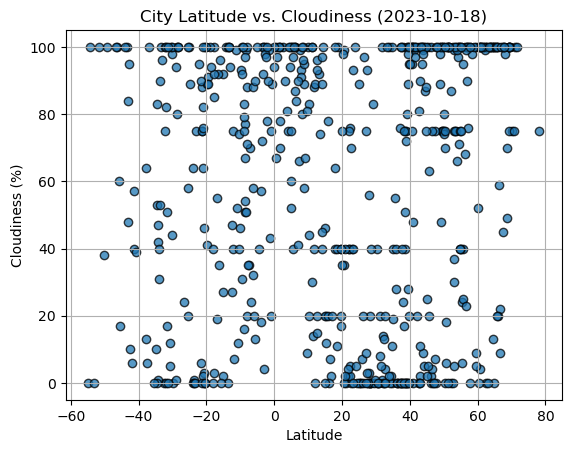

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors='k',alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(visible=True,which='major')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

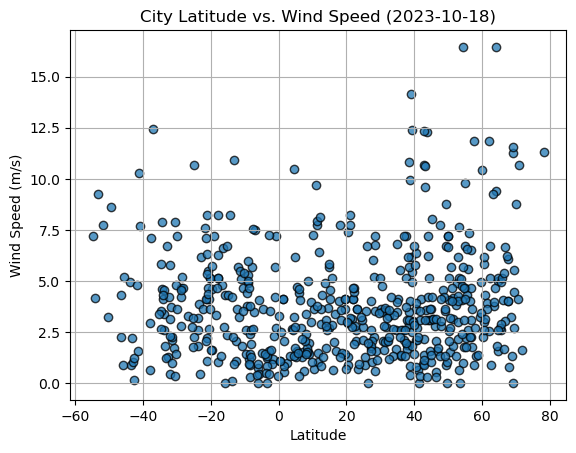

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors='k',alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(visible=True,which='major')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,pacific grove,36.6177,-121.9166,32.99,42,0,2.57,US,1697659483
4,georgetown,5.4112,100.3354,26.68,95,40,1.54,MY,1697659243
5,novofedorivka,46.1713,32.3178,11.08,60,2,2.79,UA,1697659965
6,constantia,44.1833,28.6500,9.38,75,5,3.09,RO,1697659235
7,kota tinggi,1.7381,103.8999,26.02,91,100,0.54,MY,1697659463


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,buala,-8.1450,159.5921,26.81,81,88,1.89,SB,1697659962
2,port-aux-francais,-49.3500,70.2167,3.53,96,100,8.63,TF,1697659449
3,invercargill,-46.4000,168.3500,11.12,85,100,2.24,NZ,1697659448
8,puerto ayora,-0.7393,-90.3518,29.98,91,89,2.68,EC,1697659287
10,darwin,-12.4611,130.8418,24.99,88,47,2.06,AU,1697659884


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.67308140487257


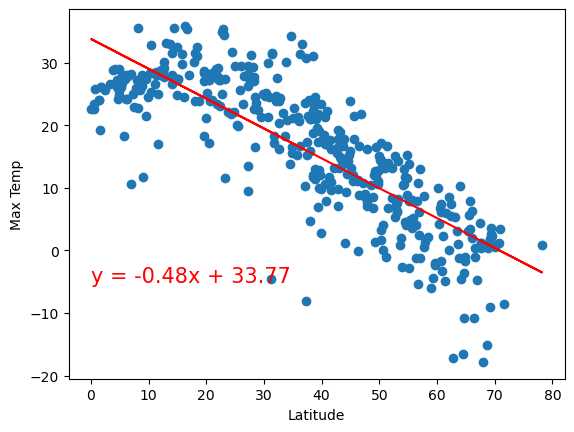

In [14]:
# Linear regression on Northern Hemisphere
r = stats.pearsonr(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
print(f"The r-value is: {r[0]**2}")
(slope,intercept,rvalue,pvalue,stderr) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
regress_values = (northern_hemi_df["Lat"]*slope)+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"],regress_values,'-',color='r')
plt.annotate(line_eq,(0,-5),color='r',fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r-value is: 0.5016696063749642


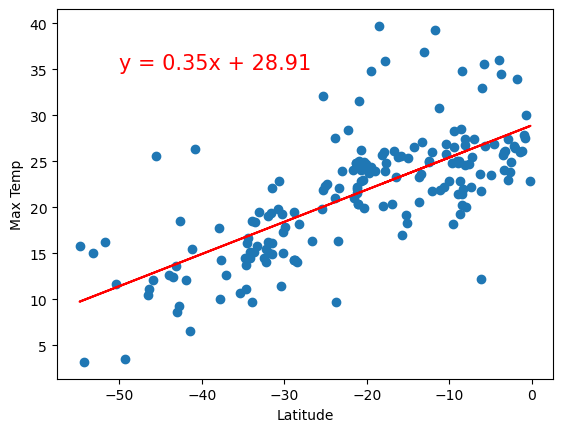

In [15]:
# Linear regression on Southern Hemisphere
r = stats.pearsonr(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
print(f"The r-value is: {r[0]**2}")
(slope,intercept,rvalue,pvalue,stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
regress_values = (southern_hemi_df["Lat"]*slope)+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"],regress_values,'-',color='r')
plt.annotate(line_eq,(-50,35),color='r',fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** The northern hemisphere data displays a strong negative correlation, where maximum temperature decreases as latitude increases, while the southern hemisphere data displays the opposite correlation, with maximum temperature increasing as latitude increases. This lines up with the expected results - temperatures increase with proximity to the equator, and decrease as you travel away from a latitude of 0 in either direction.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.016133995841263737


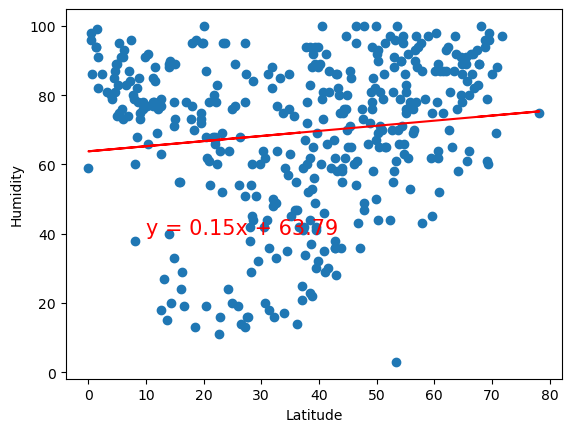

In [16]:
# Northern Hemisphere
r = stats.pearsonr(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
print(f"The r-value is: {r[0]**2}")
(slope,intercept,rvalue,pvalue,stderr) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
regress_values = (northern_hemi_df["Lat"]*slope)+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
plt.plot(northern_hemi_df["Lat"],regress_values,'-',color='r')
plt.annotate(line_eq,(10,40),color='r',fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is: 0.017336669338086842


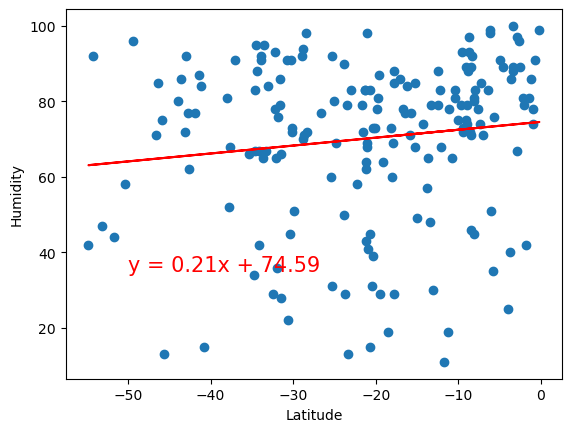

In [17]:
# Southern Hemisphere
r = stats.pearsonr(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
print(f"The r-value is: {r[0]**2}")
(slope,intercept,rvalue,pvalue,stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
regress_values = (southern_hemi_df["Lat"]*slope)+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
plt.plot(southern_hemi_df["Lat"],regress_values,'-',color='r')
plt.annotate(line_eq,(-50,35),color='r',fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** Both hemispheres display almost no correlation between latitude and humidity, with r-values below 0.05 for each. We can conclude from this trend that latitude does not have any relationship with humidity for a given city.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.01385872514333456


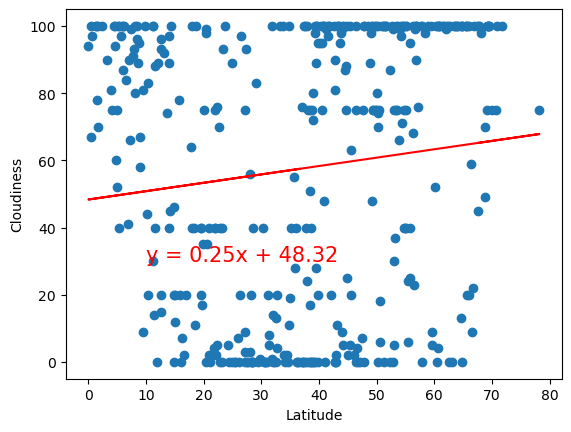

In [18]:
# Northern Hemisphere
r = stats.pearsonr(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
print(f"The r-value is: {r[0]**2}")
(slope,intercept,rvalue,pvalue,stderr) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
regress_values = (northern_hemi_df["Lat"]*slope)+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
plt.plot(northern_hemi_df["Lat"],regress_values,'-',color='r')
plt.annotate(line_eq,(10,30),color='r',fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is: 0.014440732571699593


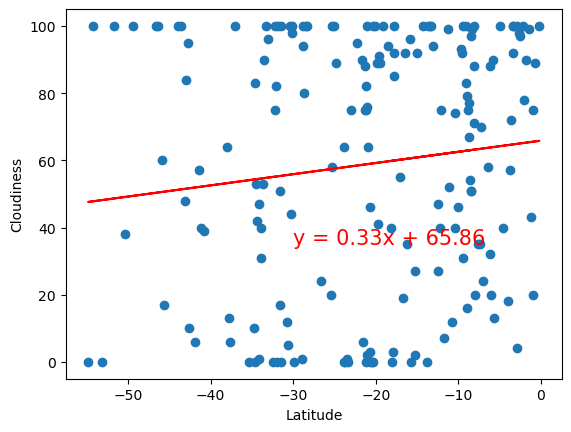

In [19]:
# Southern Hemisphere
r = stats.pearsonr(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
print(f"The r-value is: {r[0]**2}")
(slope,intercept,rvalue,pvalue,stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
regress_values = (southern_hemi_df["Lat"]*slope)+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
plt.plot(southern_hemi_df["Lat"],regress_values,'-',color='r')
plt.annotate(line_eq,(-30,35),color='r',fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** Like with humidity, these plots display almost no correlation, with r-values once again below 0.05. From this we can conclude that latitude also does not have any correlation with cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05074242209167838


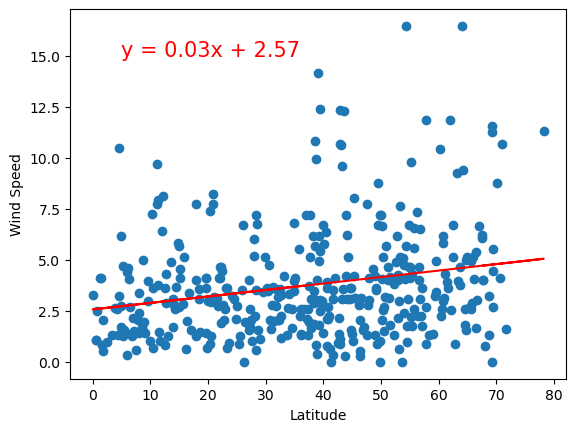

In [20]:
# Northern Hemisphere
r = stats.pearsonr(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
print(f"The r-value is: {r[0]**2}")
(slope,intercept,rvalue,pvalue,stderr) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
regress_values = (northern_hemi_df["Lat"]*slope)+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
plt.plot(northern_hemi_df["Lat"],regress_values,'-',color='r')
plt.annotate(line_eq,(5,15),color='r',fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is: 0.04612877234173698


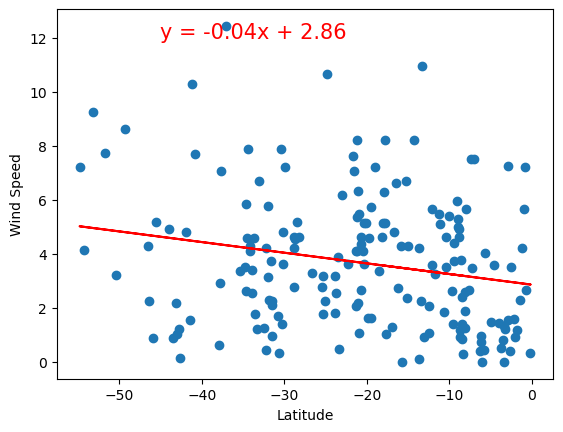

In [21]:
# Southern Hemisphere
r = stats.pearsonr(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
print(f"The r-value is: {r[0]**2}")
(slope,intercept,rvalue,pvalue,stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
regress_values = (southern_hemi_df["Lat"]*slope)+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
plt.plot(southern_hemi_df["Lat"],regress_values,'-',color='r')
plt.annotate(line_eq,(-45,12),color='r',fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** These plots appear to show a weak correlation, more so than the plots for humidity and cloudiness, but the r-values are too low to conclude any meaningful correlation between latitude and wind speed. Again, it appears there is no correlation for either hemisphere.